In [2]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



## About Dataset

A recommendation engine which is build using NLTK helping the applicants to choose thier preferred job based on their application. You will learn how lemmetizer, stemming and vectoriztion are used to process the data and have a better output.

Download data from https://www.kaggle.com/datasets/kandij/job-recommendation-datasets

In [3]:

df = pd.read_csv('Combined_Jobs_Final.csv', nrows=500)
df.head(2)

Job.ID  Provider Status                                             Slug  \
0     111         1   open                  palo-alto-ca-tacolicious-server   
1     113         1   open  san-francisco-ca-claude-lane-kitchen-staff-chef   

                              Title            Position      Company  \
0              Server @ Tacolicious              Server  Tacolicious   
1  Kitchen Staff/Chef @ Claude Lane  Kitchen Staff/Chef  Claude Lane   

            City  State.Name State.Code  ...            Industry  \
0      Palo Alto  California         CA  ...  Food and Beverages   
1  San Francisco  California         CA  ...  Food and Beverages   

                                     Job.Description  Requirements Salary  \
0  Tacolicious' first Palo Alto store just opened...           NaN    8.0   
1   \r\n\r\nNew French Brasserie in S.F. Financia...           NaN    0.0   

  Listing.Start  Listing.End  Employment.Type Education.Required  \
0           NaN          NaN        Part-Time                NaN   
1           NaN          NaN        Part-Time                NaN   

                Created.At               Updated.At  
0  2013-03-12 02:08:28 UTC  2014-08-16 15:35:36 UTC  
1  2013-04-12 08:36:36 UTC  2014-08-16 15:35:36 UTC  

[2 rows x 23 columns]

In [4]:
df.columns

Index(['Job.ID', 'Provider', 'Status', 'Slug', 'Title', 'Position', 'Company',
       'City', 'State.Name', 'State.Code', 'Address', 'Latitude', 'Longitude',
       'Industry', 'Job.Description', 'Requirements', 'Salary',
       'Listing.Start', 'Listing.End', 'Employment.Type', 'Education.Required',
       'Created.At', 'Updated.At'],
      dtype='object')

In [5]:

# Taking only important columns from the dataframe
df = df[['Job.ID','Status', 'Title', 'Position', 'Company', 'Job.Description','Education.Required','Employment.Type',
         'Industry']]

In [6]:
df.shape

(500, 9)

## Exploratory Data Analysis on selected columns

In [7]:
# Summary statistics for numerical columns
df_describe = df.describe()
print(df_describe)


              Job.ID
count     500.000000
mean   133346.256000
std     17036.632565
min       111.000000
25%    134451.750000
50%    136398.500000
75%    136525.250000
max    136652.000000


In [8]:
# Check for missing values
df_missing = df.isnull().sum()
print(df_missing)

Job.ID                  0
Status                  0
Title                   0
Position                0
Company                 4
Job.Description         0
Education.Required      8
Employment.Type         0
Industry              492
dtype: int64


In [9]:
df.isna().sum()

Job.ID                  0
Status                  0
Title                   0
Position                0
Company                 4
Job.Description         0
Education.Required      8
Employment.Type         0
Industry              492
dtype: int64

In [10]:
df.fillna("None", inplace=True)

In [11]:
df.isna().sum()


Job.ID                0
Status                0
Title                 0
Position              0
Company               0
Job.Description       0
Education.Required    0
Employment.Type       0
Industry              0
dtype: int64

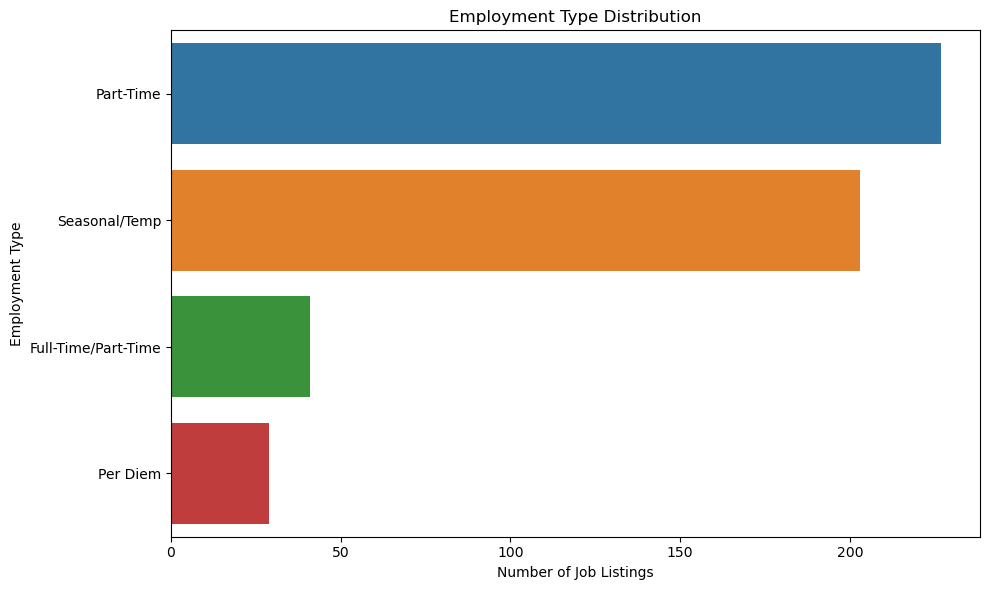

In [12]:
# Employment Type Analysis
df_employment_type = df['Employment.Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_employment_type.values, y=df_employment_type.index)
plt.title('Employment Type Distribution')
plt.xlabel('Number of Job Listings')
plt.ylabel('Employment Type')
plt.tight_layout()
plt.savefig('employment_type_distribution.png')



Plots saved: employment_type_distribution.png and top_companies_job_listings.png


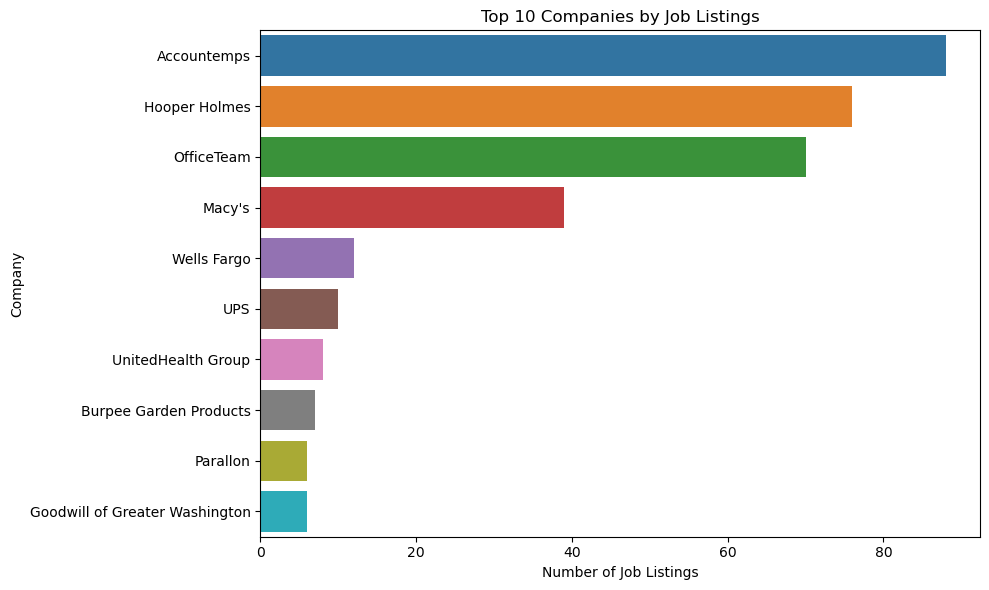

In [13]:
# Company Job Listings
df_company_count = df['Company'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=df_company_count.values, y=df_company_count.index)
plt.title('Top 10 Companies by Job Listings')
plt.xlabel('Number of Job Listings')
plt.ylabel('Company')
plt.tight_layout()
plt.savefig('top_companies_job_listings.png')

print('Plots saved: employment_type_distribution.png and top_companies_job_listings.png')

### Import necessary libraries for text preprocessing

clean and preprocess text by removing non-alphanumeric characters, converting to lowercase, removing stopwords, and performing stemming using the NLTK library. 

In [14]:
from nltk.corpus import stopwords
import nltk
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [15]:
def cleaning(txt):
    """
    Perform text cleaning on the input text.

    Parameters:
    - txt (str): The input text to be cleaned.

    Returns:
    str: The cleaned text after the following steps:
        1. Remove non-alphanumeric characters.
        2. Tokenize the text into words.
        3. Convert words to lowercase.
        4. Remove English stopwords.
        5. Perform stemming on the remaining words.
        6. Join the cleaned and processed words into a single string.
    """
#     step 1
    txt = re.sub(r'[^a-zA-Z0-9\s]','',txt)
#     step 2
    tokens = nltk.word_tokenize(txt.lower())
    # step 3 and 5
    stemming = [ps.stem(w) for w in tokens if w not in stopwords.words('english')]
    return " ".join(stemming)


In [16]:
cleaning("\n\rhelo the master piece is my loving moving cat @9032#%$")

'helo master piec love move cat 9032'

In [17]:
df['Job.Description'] = df['Job.Description'].astype(str).apply(lambda x: cleaning(x))


In [18]:
df.head()

Job.ID Status                                        Title  \
0     111   open                         Server @ Tacolicious   
1     113   open             Kitchen Staff/Chef @ Claude Lane   
2     117   open         Bartender @ Machka Restaurants Corp.   
3     121   open                      Server @ Teriyaki House   
4     127   open  Kitchen Staff/Chef @ Rosa Mexicano - Sunset   

             Position                   Company  \
0              Server               Tacolicious   
1  Kitchen Staff/Chef               Claude Lane   
2           Bartender  Machka Restaurants Corp.   
3              Server            Teriyaki House   
4  Kitchen Staff/Chef    Rosa Mexicano - Sunset   

                                     Job.Description Education.Required  \
0  tacolici first palo alto store open recent hir...               None   
1  new french brasseri sf financi district seek c...               None   
2  popular mediterranean wine bar restaur financi...               None   
3  serv fooddrink custom profession manner act ca...               None   
4  locat heart hollywood one popular mexican plac...               None   

  Employment.Type            Industry  
0       Part-Time  Food and Beverages  
1       Part-Time  Food and Beverages  
2       Part-Time  Food and Beverages  
3       Part-Time  Food and Beverages  
4       Part-Time  Food and Beverages

### Convert the relevant field to Vector using BERT model

In [19]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

/home/owais/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/owais/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [20]:
df["JobDescriptionVector"] = df["Job.Description"].apply(lambda x: model.encode(x))

In [21]:

df.head()


Job.ID Status                                        Title  \
0     111   open                         Server @ Tacolicious   
1     113   open             Kitchen Staff/Chef @ Claude Lane   
2     117   open         Bartender @ Machka Restaurants Corp.   
3     121   open                      Server @ Teriyaki House   
4     127   open  Kitchen Staff/Chef @ Rosa Mexicano - Sunset   

             Position                   Company  \
0              Server               Tacolicious   
1  Kitchen Staff/Chef               Claude Lane   
2           Bartender  Machka Restaurants Corp.   
3              Server            Teriyaki House   
4  Kitchen Staff/Chef    Rosa Mexicano - Sunset   

                                     Job.Description Education.Required  \
0  tacolici first palo alto store open recent hir...               None   
1  new french brasseri sf financi district seek c...               None   
2  popular mediterranean wine bar restaur financi...               None   
3  serv fooddrink custom profession manner act ca...               None   
4  locat heart hollywood one popular mexican plac...               None   

  Employment.Type            Industry  \
0       Part-Time  Food and Beverages   
1       Part-Time  Food and Beverages   
2       Part-Time  Food and Beverages   
3       Part-Time  Food and Beverages   
4       Part-Time  Food and Beverages   

                                JobDescriptionVector  
0  [-0.027277663, -0.0005487207, -0.047060546, 0....  
1  [0.009892334, 0.07098169, -0.012479675, 0.0082...  
2  [0.00024243459, 0.088135034, -0.017943151, -0....  
3  [0.08647057, 0.031661853, -0.024801094, -0.006...  
4  [0.004545415, 0.020816702, -0.029296057, -0.01...

In [4]:
# df.to_csv("df_cleaned.csv", index=False)

### Elasticsearch setup

In [1]:
from elasticsearch import Elasticsearch

# Connect to Elasticsearch
es = Elasticsearch(
    ["http://localhost:9200"],
    verify_certs=False,  
)
es.ping()


True

In [2]:
import pandas as pd

df_cleaned = pd.read_csv('df_cleaned.csv')
df_cleaned.head()

Job.ID Status                                        Title  \
0     111   open                         Server @ Tacolicious   
1     113   open             Kitchen Staff/Chef @ Claude Lane   
2     117   open         Bartender @ Machka Restaurants Corp.   
3     121   open                      Server @ Teriyaki House   
4     127   open  Kitchen Staff/Chef @ Rosa Mexicano - Sunset   

             Position                   Company  \
0              Server               Tacolicious   
1  Kitchen Staff/Chef               Claude Lane   
2           Bartender  Machka Restaurants Corp.   
3              Server            Teriyaki House   
4  Kitchen Staff/Chef    Rosa Mexicano - Sunset   

                                     Job.Description Education.Required  \
0  tacolici first palo alto store open recent hir...                NaN   
1  new french brasseri sf financi district seek c...                NaN   
2  popular mediterranean wine bar restaur financi...                NaN   
3  serv fooddrink custom profession manner act ca...                NaN   
4  locat heart hollywood one popular mexican plac...                NaN   

  Employment.Type            Industry  \
0       Part-Time  Food and Beverages   
1       Part-Time  Food and Beverages   
2       Part-Time  Food and Beverages   
3       Part-Time  Food and Beverages   
4       Part-Time  Food and Beverages   

                                JobDescriptionVector  
0  [-2.72776634e-02 -5.48720709e-04 -4.70605455e-...  
1  [ 9.89233423e-03  7.09816888e-02 -1.24796750e-...  
2  [ 2.42434588e-04  8.81350338e-02 -1.79431513e-...  
3  [ 8.64705667e-02  3.16618532e-02 -2.48010941e-...  
4  [ 4.54541482e-03  2.08167024e-02 -2.92960573e-...

In [3]:
df_cleaned.fillna("None", inplace=True)


In [10]:
df_cleaned.isna().sum()

Job.ID                  0
Status                  0
Title                   0
Position                0
Company                 0
Job.Description         0
Education.Required      0
Employment.Type         0
Industry                0
JobDescriptionVector    0
dtype: int64

In [22]:
es.indices.delete(index="job_description")

ObjectApiResponse({'acknowledged': True})

In [23]:
from indexMapping import indexMapping

es.indices.create(index="job_description", mappings=indexMapping)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'job_description'})

In [24]:
record_list = df_cleaned.to_dict("records")

In [25]:
record_list

[{'Job.ID': 111,
  'Status': 'open',
  'Title': 'Server @ Tacolicious',
  'Position': 'Server',
  'Company': 'Tacolicious',
  'Job.Description': 'tacolici first palo alto store open recent hire love taco love work restaur serv fooddrink custom profession manner act cashier need clean dine space train new staff',
  'Education.Required': 'None',
  'Employment.Type': 'Part-Time',
  'Industry': 'Food and Beverages',
  'JobDescriptionVector': '[-2.72776634e-02 -5.48720709e-04 -4.70605455e-02  3.45113943e-03\n  4.28952798e-02 -3.72732244e-03 -1.21956300e-02  4.05444130e-02\n -2.87832189e-02 -9.81300790e-03 -1.69367585e-02 -4.08246275e-03\n  1.33524248e-02  1.19531207e-01 -2.55039409e-02 -1.17539186e-02\n  1.93787385e-02  1.08196521e-02 -5.27489744e-02  2.47026253e-02\n -6.80713579e-02  4.00545150e-02 -4.35838811e-02  9.85316001e-03\n  2.26272438e-02  5.47632808e-03  1.81249995e-02 -2.05143392e-02\n  4.59512919e-02 -4.14103493e-02  1.34151448e-02 -4.57207626e-03\n -5.56338727e-02  3.59174330e

In [39]:
for record in record_list:
    try:
        
        es.index(index="job_description", document=record
                 , id=record['Job.ID']
                 )
    except Exception as e:
        print(e)


BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400,

BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400, 'document_parsing_exception', 'Failed to parse object: expecting token of type [VALUE_NUMBER] but found [END_OBJECT]')
BadRequestError(400,

In [9]:
es.count(index="job_description")

ObjectApiResponse({'count': 0, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}})

In [29]:
input_keyword = "accountant"
vector_of_input_keyword = model.encode(input_keyword)

query = {
    "field" : "JobDescriptionVector",
    "query_vector" : vector_of_input_keyword,
    "k" : 2,
    "num_candidates" : 500, 
}

res = es.knn_search(index="job_description", knn=query , source=["Title","Job.Description"])
res["hits"]["hits"]

/tmp/ipykernel_3908/1148459423.py:11: ElasticsearchWarning: The kNN search API has been replaced by the `knn` option in the search API.
  res = es.knn_search(index="job_description", knn=query , source=["Title","Job.Description"])


[]